Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


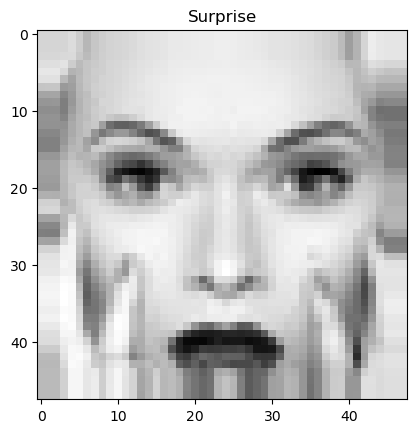

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)             │ (None, 1, 1, 1920)          │      18,321,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1920)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         491,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,815,559 (71.78 MB)

 Trainable params: 18,586,503 (70.90 MB)

 Non-trainable params: 229,056 (894.75 KB)

C:\Users\viole\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 5728s 11s/step - accuracy: 0.3083 - loss: 1.7580 - val_accuracy: 0.2220 - val_loss: 2.0649
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 54:56 7s/step - accuracy: 0.3750 - loss: 1.3454

M:\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.3750 - loss: 1.3454 - val_accuracy: 0.3000 - val_loss: 1.4032
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 3371s 8s/step - accuracy: 0.3746 - loss: 1.5904 - val_accuracy: 0.3891 - val_loss: 1.6838
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.4062 - loss: 1.4884 - val_accuracy: 0.4000 - val_loss: 1.5792
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 3246s 7s/step - accuracy: 0.4152 - loss: 1.5153 - val_accuracy: 0.2536 - val_loss: 1.8988
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3906 - loss: 1.4852 - val_accuracy: 0.0000e+00 - val_loss: 1.9160
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 3180s 7s/step - accuracy: 0.4273 - loss: 1.4888 - val_accuracy: 0.4167 - val_loss: 1.4960
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3750 - loss: 1.3531 - val_accuracy: 0.4000 - val_loss: 1.6477
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 2981s 7s/step - accuracy: 0.4683 - loss: 1.3927 - val_accurac

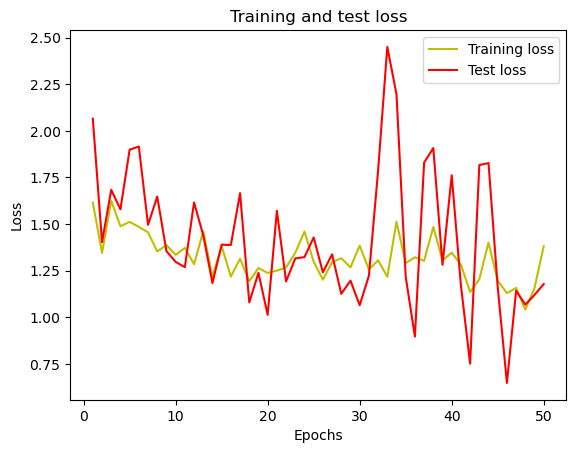

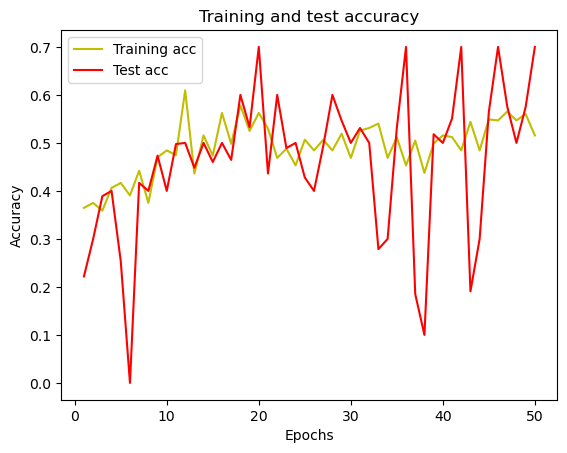

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 529ms/step
Accuracy =  0.5625


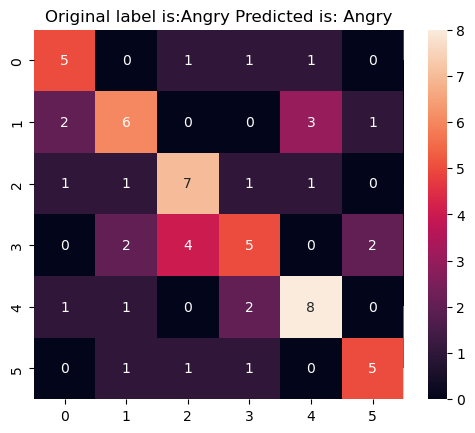

In [41]:
#Code based on https://www.youtube.com/watch?v=TJ3i5r1pq98
import os
import random
import numpy as np
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Sets image dimensions and batch size
IMG_HEIGHT = 48
IMG_WIDTH = 48
batch_size = 64
classes = 7
epochs=50

train_data_dir = 'data/train/'
test_data_dir = 'data/test/'

class_labels=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

#Only for training data
train_datagen = ImageDataGenerator(
                    rescale=1./255, #Rescales pixel values to 0,1 range
                    rotation_range=30, #Rotates image by up to 30 degrees
                    shear_range=0.3, 
                    zoom_range=0.3,
                    horizontal_flip=True, #Flip some images horizontally
                    fill_mode='nearest') #Fills pixels with nearest values

#Only for testing data
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_data_dir,
                    color_mode='rgb', #Images are loaded in rgb
                    target_size=(IMG_HEIGHT,IMG_WIDTH), #Images are resized
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True) #Shuffle data for randomness

test_generator = test_datagen.flow_from_directory(
                    test_data_dir,
                    color_mode='rgb', #Images are loaded in rgb
                    target_size=(IMG_HEIGHT,IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True)

#Sets up a checkpoint to bring back best weights found
checkpoint = ModelCheckpoint(
    filepath='dense_best.weights.h5',
    monitor='accuracy',         # Monitor validation loss
    save_best_only=True,        # Save only the best weights
    save_weights_only=True     # Save only weights, not the entire model
)


#Displays random training image
img,label = train_generator.__next__()

#Chooses random image
i=random.randint(0, (img.shape[0])-1)
image = img[i]
label = class_labels[label[i].argmax()] #Finds the label
plt.imshow(image[:,:,0], cmap='gray') #Shows image in grayscale
plt.title(label)
plt.show()

dense_net = DenseNet201(include_top=False, weights='imagenet',input_shape=(48,48,3))

model = Sequential()
model.add(dense_net)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(classes, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

num_train_imgs = 0
for root, dirs, files in os.walk(train_data_dir):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_data_dir):
    num_test_imgs += len(files)
    
#Stops training once no improvement 
early_stopping = EarlyStopping(monitor='val_loss', 
                              patience = 5, #Waits for this number of empochs after no improvements
                              restore_best_weights=True) # Restores weights of best epoch

#Trains the model
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size, #Calculates steps per epoch
                epochs=epochs,
                validation_data=test_generator, #Sets test_generator for validation
                validation_steps=num_test_imgs//batch_size,
                callbacks=[checkpoint])

#model.load_weights('dense_best.weights.h5')

#Saves model
model.save('densenet_model.h5')

#plot the training and test accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Test acc')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Test the model
my_model = load_model('densenet_model.h5', compile=False)

#Generate a batch of images
test_img, test_lbl = test_generator.__next__()

#Predicts labels
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, predictions)
#print(cm)
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 446ms/step
Accuracy =  0.71875


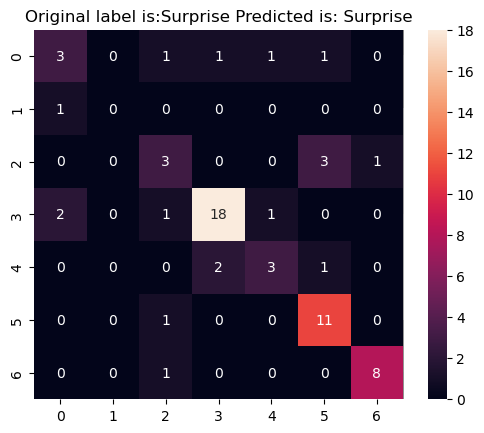

In [43]:
#Test the model
my_model = load_model('densenet_model.h5', compile=False)

#Generate a batch of images
test_img, test_lbl = test_generator.__next__()

#Predicts labels
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, predictions)
#print(cm)
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()